In [4]:
import os

HOME = "/mnt/hdd/eric/.tmp_ipy/16.MIND_Lab/01.Projects/03.Grounding_Bbox/"
CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinB_cfg.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

/mnt/hdd/eric/.tmp_ipy/16.MIND_Lab/01.Projects/03.Grounding_Bbox/GroundingDINO/groundingdino/config/GroundingDINO_SwinB_cfg.py ; exist: True


In [5]:
WEIGHTS_PATH = "/mnt/hdd/eric/.tmp_ipy/00.Data/00.Weights/grounding_dino/groundingdino_swinb_cogcoor.pth"
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

/mnt/hdd/eric/.tmp_ipy/00.Data/00.Weights/grounding_dino/groundingdino_swinb_cogcoor.pth ; exist: True


In [6]:

from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model(CONFIG_PATH, WEIGHTS_PATH)

final text_encoder_type: bert-base-uncased


In [125]:
import os
import supervision as sv

DATA_HOME = "/mnt/hdd/eric/.tmp_ipy/00.Data/grounding_dino_sample/"

IMAGE_NAME = "799"
IMAGE_PATH = os.path.join(DATA_HOME,"imgs", IMAGE_NAME +".png")
print(os.path.exists(IMAGE_PATH))

TEXT_PATH =  os.path.join(DATA_HOME,"anns", IMAGE_NAME +".txt")
print(os.path.exists(TEXT_PATH))

with open(TEXT_PATH) as text_file:
    texts_ = text_file.readlines()

print(texts_)

TEXT_PROMPT = "guns"
BOX_TRESHOLD = 0.30
TEXT_TRESHOLD = 0.35

True
True
["1: {'before_matched_triplets': [['soldiers', 'in', 'camouflage gear'], ['soldiers', 'marching down', 'road'], ['road', 'with', 'military vehicles'], ['road', 'with', 'tank'], ['environment', 'in', 'background']]}\n"]


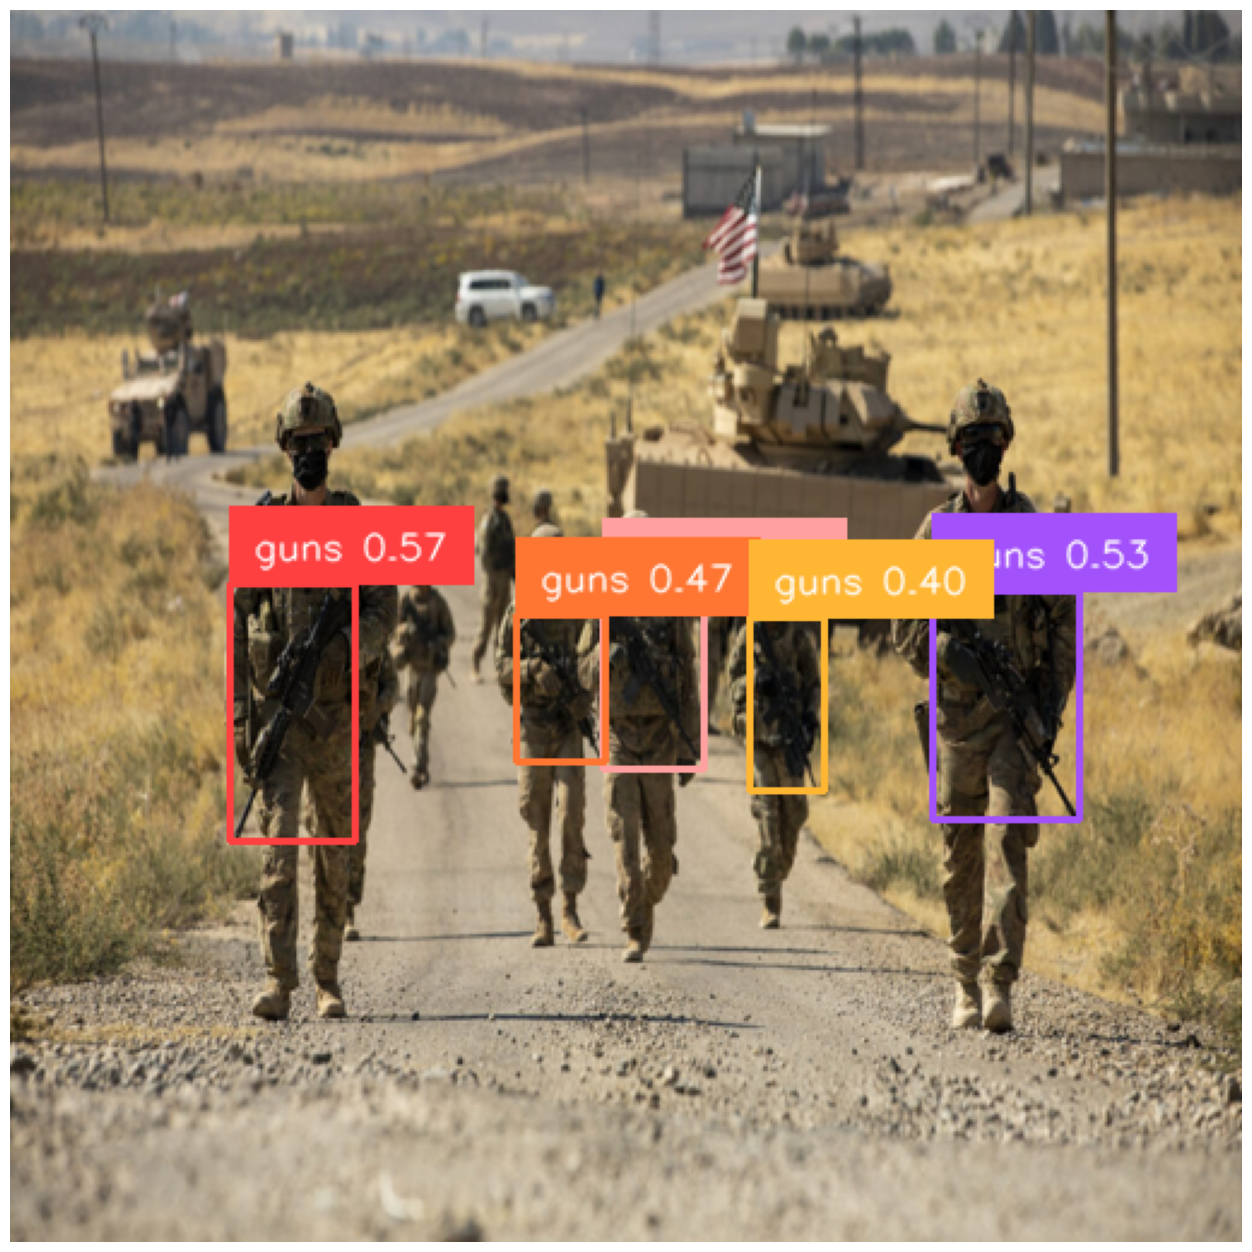

In [126]:
image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model, 
    image=image, 
    caption=TEXT_PROMPT, 
    box_threshold=BOX_TRESHOLD, 
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline  
sv.plot_image(annotated_frame, (16, 16))